In [32]:
# IMPORTS

import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('horse.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(415, 642)
[[[0.04991089 0.04991089 0.03887064]
  [0.04404621 0.04404621 0.04404621]
  [0.03027249 0.03027249 0.03887064]]

 [[0.04404621 0.04404621 0.04404621]
  [0.03887064 0.03887064 0.04991089]
  [0.02671537 0.02671537 0.04404621]]

 [[0.03027249 0.03027249 0.03887064]
  [0.02671537 0.02671537 0.04404621]
  [0.01836119 0.01836119 0.03887064]]]


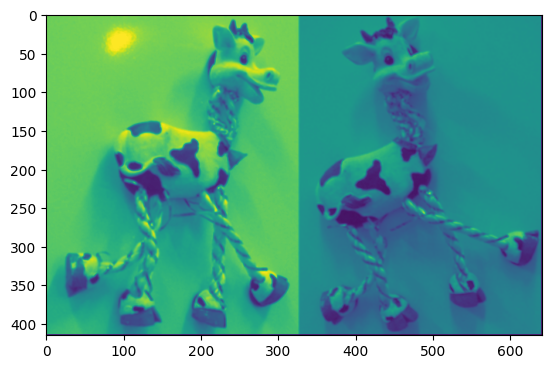

In [6]:
# 1. Gaussian kernel smoothing

print(image.shape)

sigma = 2

def gaussian(x, y, k_size):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - k_size//2)**2 + (y - k_size//2)**2) / (2 * sigma**2))

def filter2D(img, kernel, k_size):
    img_height, img_width = img.shape
    filtered_img = np.zeros((img.shape), dtype=float) # init result img
    k_middle = k_size // 2
    
    # iterate through pixels in img
    for i in range(img_height - k_size + 1):
        for j in range(img_width - k_size + 1):
            k_image = img[i:i+k_size, j:j+k_size] # grab section of image using filter
            filtered_img[i+k_middle, j+k_middle] = np.sum(k_image * kernel) # assign weighted sum to middle of kernel's img

    return filtered_img


# np.fromfunction() returns matrix based on function inputted
# creates our kernel essentially
k_size = 3
kernel = np.fromfunction(gaussian, (k_size, k_size, k_size))
kernel /= np.sum(kernel) # normalize kernel
print(kernel)

smoothed = filter2D(image, kernel, k_size).astype(np.uint8)

plt.imshow(smoothed)



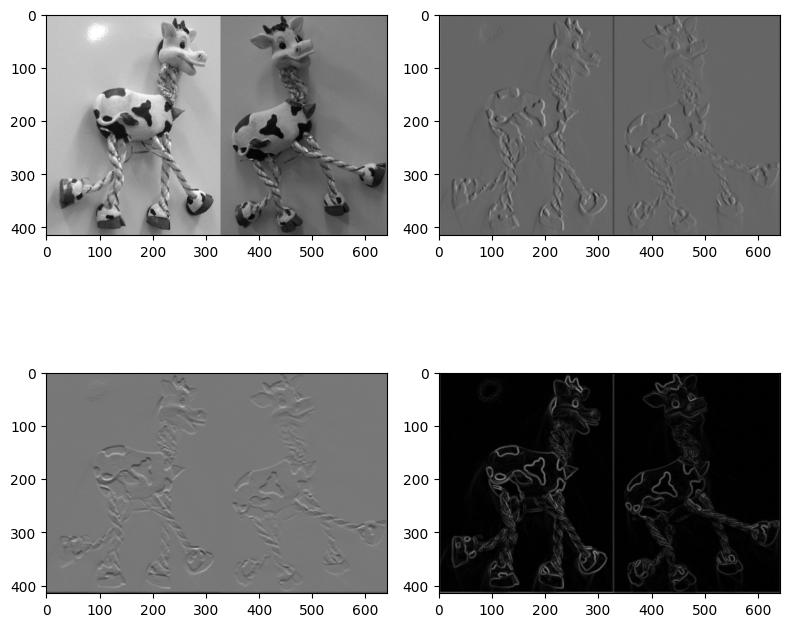

In [7]:
# 2. Derivatives of smoothed img

G_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=float)
G_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float)

Ix = filter2D(smoothed, G_x, 3)
Iy = filter2D(smoothed, G_y, 3)

# magnitude of gradient
magnitude = np.sqrt(Ix**2 + Iy**2)

# Visualizing: original, gradient in x, gradient in y, and magnitude
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(Ix, cmap='gray')
plt.subplot(223)
plt.imshow(Iy, cmap='gray')
plt.subplot(224)
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()

plt.show()

[[ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  3.48099e+05 -2.36100e+03 ...  0.00000e+00 -1.47456e+05
   0.00000e+00]
 [ 0.00000e+00  2.36100e+03 -1.60000e+01 ...  1.00000e+00  1.02400e+03
   0.00000e+00]
 ...
 [ 0.00000e+00  1.98900e+03  1.60000e+01 ...  0.00000e+00 -9.12000e+02
   0.00000e+00]
 [ 0.00000e+00 -2.48004e+05 -1.99500e+03 ... -9.12000e+02  1.16964e+05
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]]


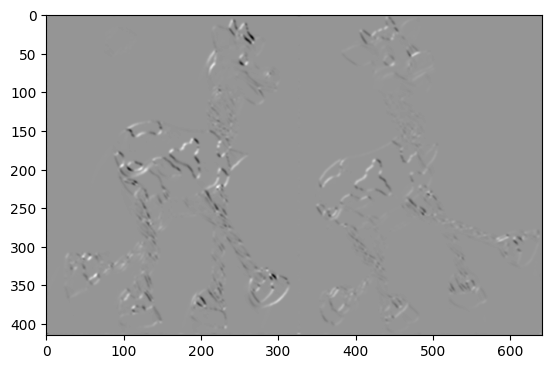

In [8]:
# 3. and 4. Compute derivatives at each pixel and smooth them

Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

Ixx_smooth = filter2D(Ixx, kernel, k_size)
Iyy_smooth = filter2D(Iyy, kernel, k_size)
Ixy_smooth = filter2D(Ixy, kernel, k_size)

print(Ixy)
plt.imshow(Ixy_smooth, cmap='gray')

(415, 642, 2, 2)
(415, 642)
19387890000.0 0.0


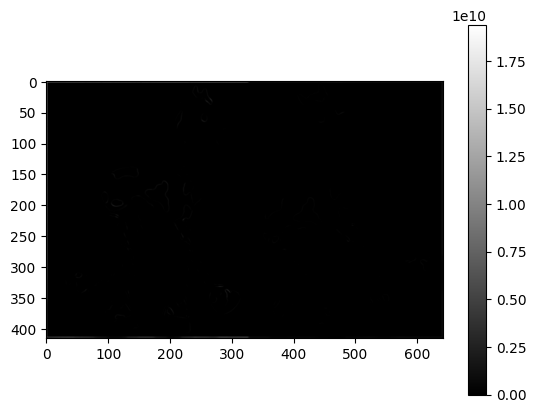

In [24]:
# 5. and 6. Define H(x,y) and compute response

k = 0.04 # Harris response hyperparameter for controlling sensitivity
H = np.empty((smoothed.shape[0], smoothed.shape[1], 2, 2), dtype=np.float32)
R = np.empty((smoothed.shape[0], smoothed.shape[1]), dtype=np.float32)

# H(x,y) for each pixel
for i in range(smoothed.shape[0]):
    for j in range(smoothed.shape[1]):
        H[i, j] = np.array([[Ixx[i, j], Ixy[i, j]], [Ixy[i, j], Iyy[i, j]]])
        detH = np.linalg.det(H[i,j])
        traceH = np.trace(H[i,j])
        R[i, j] = np.abs(detH - k * (traceH ** 2))


print(H.shape)
print(R.shape)
# compute harris response
print(np.max(R), np.min(R))


In [43]:
image_3c = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

In [44]:
image_3c[R > 0.01*R.max()] = np.array([255, 0, 0])

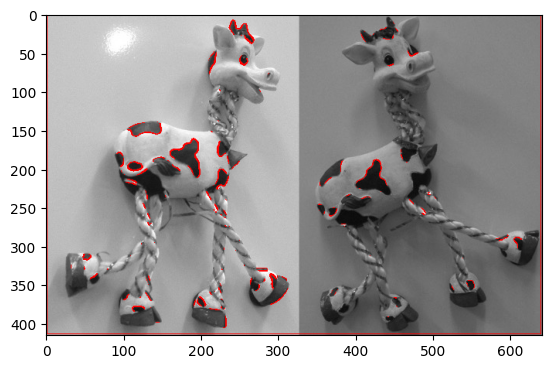

In [45]:
plt.imshow(image_3c)